Import Datasets

In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
d=pd.read_csv(r'Phising_Training_Dataset.csv')
d

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,21294,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
8951,21295,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
8952,21296,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
8953,21297,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


Pre-Process

In [107]:
#description,info,size,shape and null in d
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

In [108]:
print("Size:",d.size)
print("Shape:",d.shape)

Size: 286560
Shape: (8955, 32)


In [109]:
print("Total no.of NaN values in this data set is",d.isna().sum().sum())

Total no.of NaN values in this data set is 0


Exporatory Data Analysis

In [110]:
d.columns

Index(['key', 'having_IP', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [111]:
#frequencies of good and bad sites in every column
x=list(d.columns)
x=x[1:]
for i in x:
    print("good sites according to",i,"are",list(d[i].values).count(1),end=", ")
    print("suspicious sites according to",i,"are",list(d[i].values).count(0),end=", ")
    print("bad sites according to",i,"are",list(d[i].values).count(-1),end=", ")
    print()

good sites according to having_IP are 5853, suspicious sites according to having_IP are 0, bad sites according to having_IP are 3102, 
good sites according to URL_Length are 1574, suspicious sites according to URL_Length are 114, bad sites according to URL_Length are 7267, 
good sites according to Shortining_Service are 7793, suspicious sites according to Shortining_Service are 0, bad sites according to Shortining_Service are 1162, 
good sites according to having_At_Symbol are 7654, suspicious sites according to having_At_Symbol are 0, bad sites according to having_At_Symbol are 1301, 
good sites according to double_slash_redirecting are 7794, suspicious sites according to double_slash_redirecting are 0, bad sites according to double_slash_redirecting are 1161, 
good sites according to Prefix_Suffix are 1185, suspicious sites according to Prefix_Suffix are 0, bad sites according to Prefix_Suffix are 7770, 
good sites according to having_Sub_Domain are 3336, suspicious sites according t

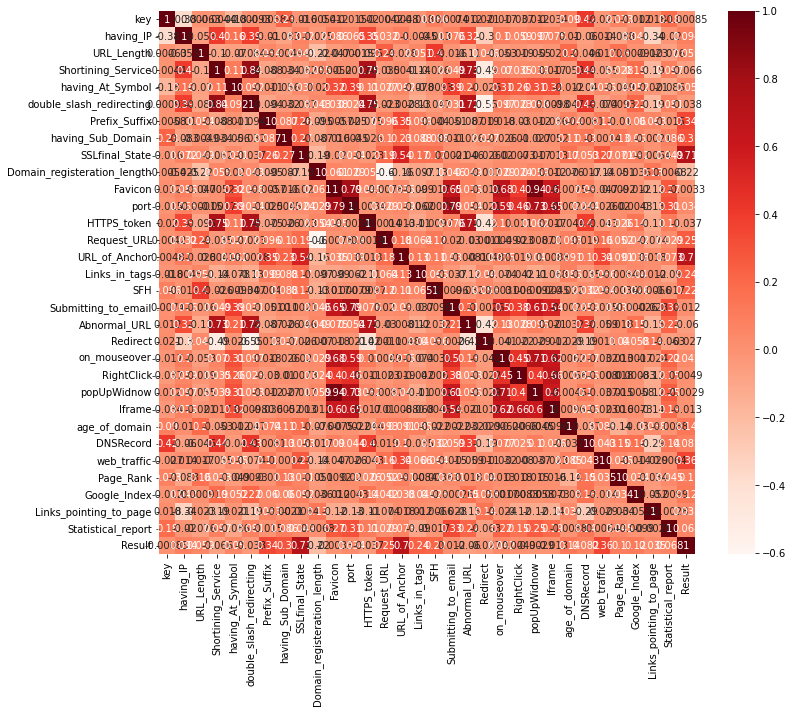

In [112]:
#identifying key features to build model
import seaborn as sns
%matplotlib inline
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = d.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [113]:
corre=d.corr().abs()
upper = corre.where(np.triu(np.ones(corre.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.2
feature = [column for column in upper.columns if any(upper[column] > 0.2)]
feature

['having_IP',
 'Shortining_Service',
 'double_slash_redirecting',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'DNSRecord',
 'web_traffic',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report',
 'Result']

In [114]:
d=d[feature]

In [115]:
d

,having_IP,Shortining_Service,double_slash_redirecting,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,...,on_mouseover,RightClick,popUpWidnow,Iframe,DNSRecord,web_traffic,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,-1,-1,-1,-1,1,1,-1,1,...,1,1,1,1,-1,-1,1,1,-1,-1
1,1,1,1,0,1,-1,1,1,-1,1,...,1,1,1,1,-1,0,1,1,1,-1
2,1,1,1,-1,-1,-1,1,1,-1,1,...,1,1,1,1,-1,1,1,0,-1,-1
3,1,1,1,-1,-1,1,1,1,-1,-1,...,1,1,1,1,-1,1,1,-1,1,-1
4,1,-1,1,1,1,-1,1,1,1,1,...,-1,1,-1,1,-1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,1,1,1,1,1,-1,-1,-1,1,1,...,-1,-1,-1,-1,1,-1,1,1,1,1
8951,-1,1,-1,1,-1,-1,-1,-1,1,1,...,-1,1,-1,1,1,1,1,-1,1,-1
8952,1,1,1,1,-1,-1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,-1
8953,-1,1,1,-1,-1,1,-1,1,1,-1,...,-1,1,-1,1,1,1,1,1,1,-1


Building Model

In [116]:
from sklearn import metrics
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

dividing features and target

In [117]:
X=d.drop('Result',axis=1)
y=d['Result']

Initializng model

In [118]:
# Initializing Support Vector classifier
classifier1 = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

# Initializing Multi-layer perceptron  classifier
classifier2 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)

# Initialing Nu Support Vector classifier
classifier3 = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)

# Initializing Random Forest classifier
classifier4 = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 1000)

Fitting dataset into models

In [119]:
classifier1.fit(X,y)
classifier2.fit(X,y)
classifier3.fit(X,y)
classifier4.fit(X,y)

RandomForestClassifier(max_depth=10, min_samples_leaf=0.005,
                       min_samples_split=0.005, n_estimators=500, n_jobs=-1,
                       random_state=1000)

Predicting target through validation

In [120]:
pred1=classifier1.predict(X)
pred2=classifier2.predict(X)
pred3=classifier3.predict(X)
pred4=classifier4.predict(X)

Getting accuracy

In [121]:
auc1=metrics.roc_auc_score(y,pred1)
auc2=metrics.roc_auc_score(y,pred2)
auc3=metrics.roc_auc_score(y,pred3)
auc4=metrics.roc_auc_score(y,pred4)

In [122]:
print("Accuracy of Support Vector Classifier",auc1)
print("Accuracy of Multi-layer perceptron  classifier",auc2)
print("Accuracy of Nu Support Vector classifier",auc3)
print("Accuracy of Random Forest classifier",auc4)

Accuracy of Support Vector Classifier 0.9637250172431141
Accuracy of Multi-layer perceptron  classifier 0.9525264163899714
Accuracy of Nu Support Vector classifier 0.9221628047866702
Accuracy of Random Forest classifier 0.9209587505802167


Accuracy of support vector machine is higher so this model is used to predict the Test data

Importing and  analyzing test data

In [123]:
test=pd.read_csv(r'Phising_Testing_Dataset.csv')
test

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,23433,-1,-1,-1,1,-1,-1,1,1,1,...,1,1,1,1,-1,1,-1,-1,1,1
2096,23434,1,1,1,-1,1,-1,1,1,-1,...,1,-1,1,-1,1,-1,1,1,1,1
2097,23435,1,-1,1,1,1,-1,-1,-1,1,...,1,1,1,-1,1,0,-1,1,0,1
2098,23436,1,-1,1,-1,1,-1,0,-1,-1,...,1,-1,-1,1,1,-1,-1,1,1,1


In [124]:
key=test['key']

In [125]:
feature=feature[:-1]
feature

['having_IP',
 'Shortining_Service',
 'double_slash_redirecting',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'DNSRecord',
 'web_traffic',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report']

In [126]:
test=test[feature]
test

,having_IP,Shortining_Service,double_slash_redirecting,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,...,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,DNSRecord,web_traffic,Google_Index,Links_pointing_to_page,Statistical_report
0,1,1,1,-1,1,-1,1,1,1,1,...,0,1,1,1,1,1,1,-1,0,1
1,1,1,1,0,-1,1,1,1,1,1,...,0,1,1,1,1,-1,0,-1,0,1
2,1,1,1,0,0,-1,-1,-1,1,-1,...,0,-1,-1,-1,-1,-1,1,1,1,-1
3,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,...,1,-1,1,-1,-1,-1,1,1,1,-1
4,1,1,1,1,1,-1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,-1,-1,-1,1,1,1,1,1,-1,-1,...,1,1,1,1,1,-1,1,-1,1,1
2096,1,1,1,1,1,-1,-1,-1,1,1,...,0,1,1,-1,1,1,-1,1,1,1
2097,1,1,1,-1,-1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,1
2098,1,1,1,0,-1,-1,-1,-1,1,1,...,0,-1,1,-1,-1,1,-1,1,1,1


Predicting target 

In [127]:
testpred=classifier1.predict(test)
testpred

array([ 1, -1, -1, ..., -1,  1,  1], dtype=int64)

Storing result

In [136]:
final=pd.DataFrame({'key':key,'Result':testpred})
final.to_csv('final_submssion.csv',index=False)